In [1]:
import numpy as np

In [ ]:
from gensim import models
w = models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)

In [93]:
a = np.load("../data/word2vec.npy")

In [120]:
from cuml.preprocessing import normalize
a = normalize(a)

In [94]:
from cuml.experimental.cluster import HDBSCAN

In [95]:
%%time
from hdbscan import HDBSCAN as HDBSCANref
hdbscan = HDBSCANref(min_samples=10, min_cluster_size=25)
labels = hdbscan.fit_predict(a[:10000])

CPU times: user 39.5 s, sys: 24 ms, total: 39.6 s
Wall time: 39.5 s


In [96]:
from cuml.manifold import UMAP

In [97]:
%%time
from umap import UMAP as UMAPref
umap = UMAPref(n_neighbors=25, metric='cosine')
embeddings = umap.fit_transform(a[:10000])

CPU times: user 10min 58s, sys: 29.5 s, total: 11min 27s
Wall time: 11.3 s


In [98]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

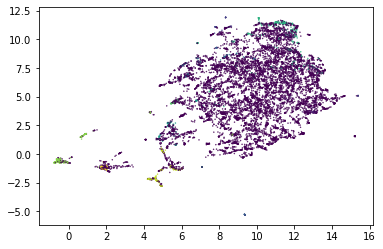

In [99]:
import matplotlib.pyplot as plt

plt.scatter(embeddings[:10000,0], embeddings[:10000,1], c=labels[:10000], s=0.2)

In [404]:
from cuml.decomposition import PCA
pca = PCA(n_components=50)
a = pca.fit_transform(a)

In [571]:
n_points = 300000

In [676]:
%%time
hdbscan = HDBSCAN(min_samples=100, min_cluster_size=100, cluster_selection_method='leaf')
labels = hdbscan.fit_predict(a[:n_points])

CPU times: user 14.3 s, sys: 2.63 s, total: 17 s
Wall time: 16.9 s


In [677]:
%%time
umap = UMAP(n_neighbors=100, min_dist=0.01, n_epochs=100, random_state=42)
embeddings = umap.fit_transform(a[:n_points])

CPU times: user 3.59 s, sys: 1.55 s, total: 5.15 s
Wall time: 5.13 s


In [678]:
np.unique(labels)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

In [679]:
from matplotlib.pyplot import figure
x = embeddings[:,0]
y = embeddings[:,1]
x = x[labels>=0]
y = y[labels>=0]

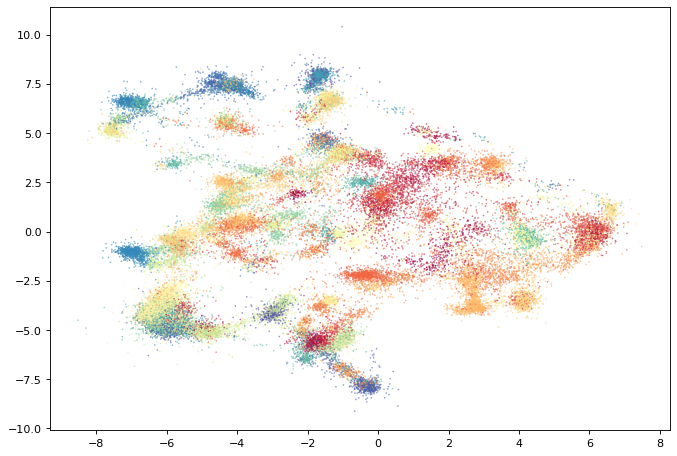

In [680]:
import matplotlib.pyplot as plt
figure(figsize=(10, 7), dpi=80)
plt.scatter(x[:n_points], y[:n_points], c=labels[labels>=0], s=0.1, cmap='Spectral')

In [681]:
x_n = embeddings[:,0]
x_n = x_n[labels == -1]
y_n = embeddings[:,1]
y_n = y_n[labels == -1]
l_n = labels[labels == -1]

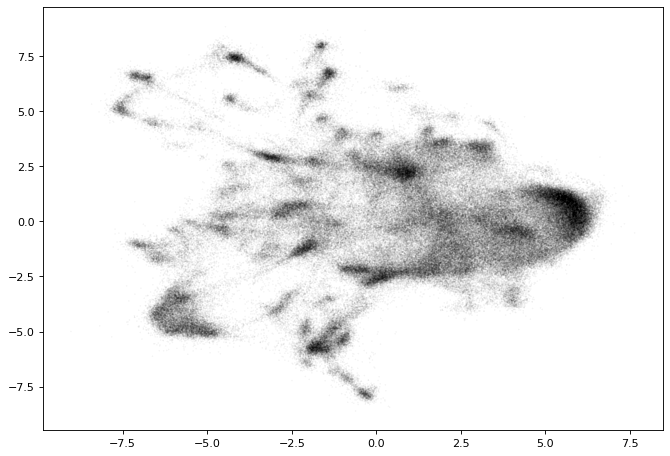

In [682]:
import matplotlib.pyplot as plt
figure(figsize=(10, 7), dpi=80)
plt.scatter(x_n[:n_points], y_n[:n_points], c=l_n[:n_points], alpha=0.08, s=0.07, cmap='bone')

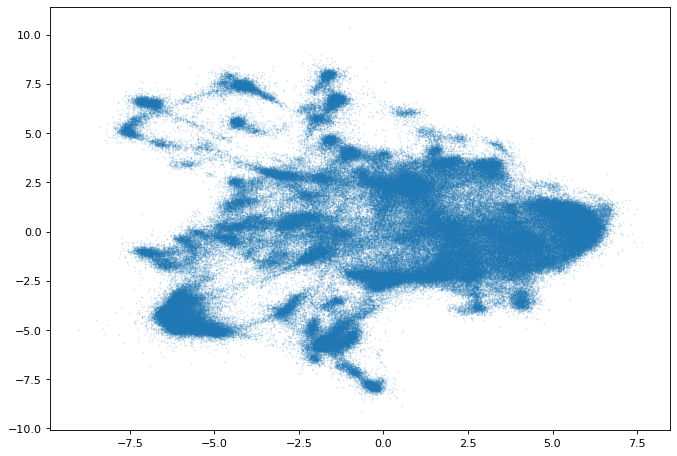

In [683]:
figure(figsize=(10, 7), dpi=80)
plt.scatter(embeddings[:,0], embeddings[:,1], s=0.1, alpha=0.3)